# Times Series (Stationarity)

### Phillips Curve Data set

The data set in the file "phillips.xls" contains yearly rates of inflation and unemployment for the US over the period from 1948 to 2003.

We will use this data set to test the Phillips Curve theory.

The data set is presented in the book Introductory Econometrics: A Modern Approach, 7th Edition (Jeffrey M. Wooldridge)

In [2]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.graphics.tsaplots as sts
import statsmodels.tsa.arima_process as sta
import statsmodels.tsa.arima.model as stm
import statsmodels.tsa.stattools as stt
from statsmodels.tsa.api import ARDL

In [3]:
df = pd.read_excel("phillips.xls")
df

,year,unemployment,inflation
0,1948,3.8,8.1
1,1949,5.9,-1.2
2,1950,5.3,1.3
3,1951,3.3,7.9
4,1952,3.0,1.9
5,1953,2.9,0.8
6,1954,5.5,0.7
7,1955,4.4,-0.4
8,1956,4.1,1.5
9,1957,4.3,3.3


<function matplotlib.pyplot.show(close=None, block=None)>

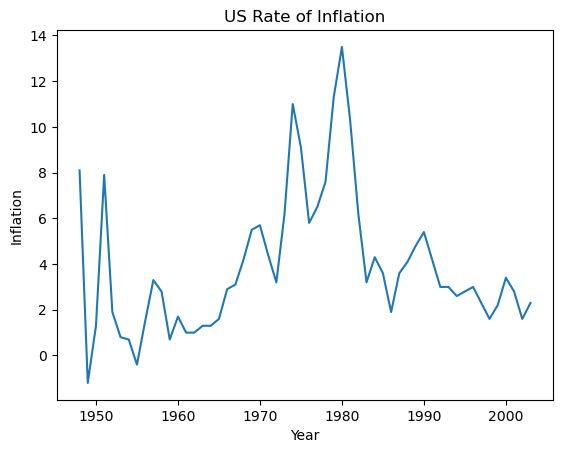

In [4]:
# Plotting the Inflation Series

plt.plot(df.year,df.inflation)

title = "US Rate of Inflation"

plt.title(title)                             # Plot title
plt.xlabel("Year")                        # Plot x-axis label
plt.ylabel("Inflation")                   # Plot y-axis label

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

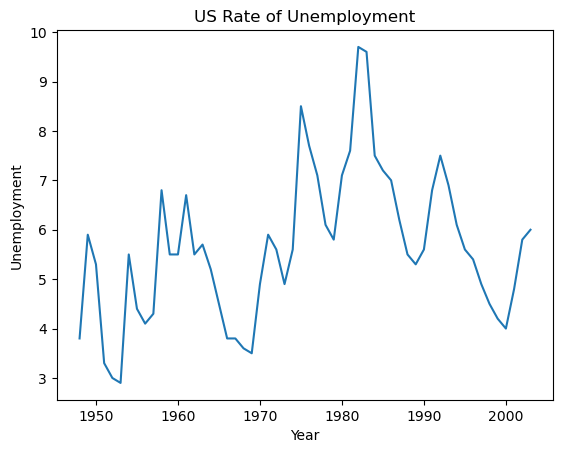

In [5]:
# Plotting the Unemployment Series

plt.plot(df.year,df.unemployment)

title = "US Rate of Unemployment"

plt.title(title)                             # Plot title
plt.xlabel("Year")                        # Plot x-axis label
plt.ylabel("Unemployment")                   # Plot y-axis label

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

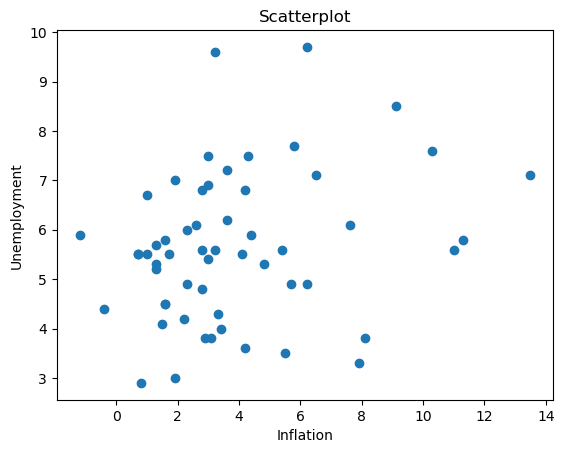

In [6]:
# Scatter plot of Inflation and Unemployment

plt.scatter(df.inflation,df.unemployment)

title = "Scatterplot"

plt.title(title)                             # Plot title
plt.xlabel("Inflation")                        # Plot x-axis label
plt.ylabel("Unemployment")                   # Plot y-axis label

plt.show

## Static Phillips Curve

The static Phillips curve suggests a trade-off between Inflation and Unemployment. A linear model representing this would be presented as

$$ inflation_t= \beta_0 + \beta_1 unemployment_t + u_t$$

In [7]:
formula = "inflation ~ unemployment"

model = smf.ols(formula, df).fit(cov_type = "HC1")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     4.106
Date:                Tue, 30 Apr 2024   Prob (F-statistic):             0.0477
Time:                        21:32:51   Log-Likelihood:                -139.43
No. Observations:                  56   AIC:                             282.9
Df Residuals:                      54   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0536      1.380      0.764   

## Augmented Dickey-Fuller (ADF) Test 

The ADF test will test for the presence of unit root (non-stationarity) in a time series.

If the p-value of the ADF statistic is less than $\alpha$ we reject the null hypothesis.

Rejecting the null hypothesis means that we have evidence that the series is stationary.

In [8]:
# Performing the Augmented Dickey-Fuller (ADF) test for the Inflation and Unemployment series

test_inf = stt.adfuller(df["inflation"])
test_unemp = stt.adfuller(df["unemployment"])

adf_statistic_inf = test_inf[0]
adf_statistic_unemp  = test_unemp[0]

p_value_inf = test_inf[1]
p_value_unemp = test_unemp[1]

# Printing ADF test statistic and p-value for the Inflation and Unemployment series
print("Inflation: ADF statistic", round(adf_statistic_inf,4),"and p-value",round(p_value_inf,4))
print("Unemployment: ADF statistic", round(adf_statistic_unemp,4),"and p-value",round(p_value_unemp,4))

Inflation: ADF statistic -1.7459 and p-value 0.4077
Unemployment: ADF statistic -2.868 and p-value 0.0492


In [9]:
# Creating variable Delta Inflation

df["delta_inflation"] = df["inflation"].diff()
df = df.dropna()
df

,year,unemployment,inflation,delta_inflation
1,1949,5.9,-1.2,-9.3
2,1950,5.3,1.3,2.5
3,1951,3.3,7.9,6.6
4,1952,3.0,1.9,-6.0
5,1953,2.9,0.8,-1.1
6,1954,5.5,0.7,-0.1
7,1955,4.4,-0.4,-1.1
8,1956,4.1,1.5,1.9
9,1957,4.3,3.3,1.8
10,1958,6.8,2.8,-0.5


<function matplotlib.pyplot.show(close=None, block=None)>

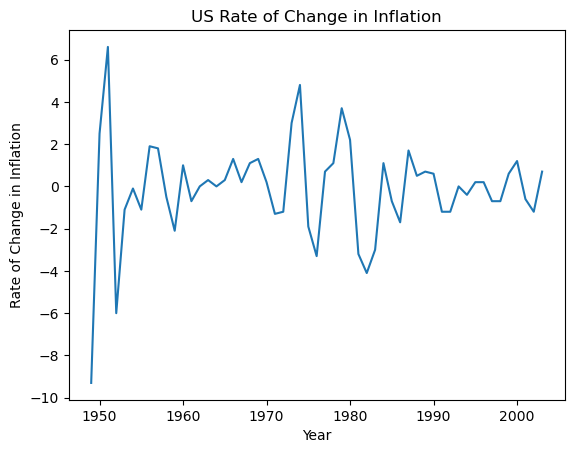

In [10]:
# Plotting the rate of change in Inflation Series

plt.plot(df.year,df.delta_inflation)

title = "US Rate of Change in Inflation"

plt.title(title)                             # Plot title
plt.xlabel("Year")                        # Plot x-axis label
plt.ylabel("Rate of Change in Inflation")                   # Plot y-axis label

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

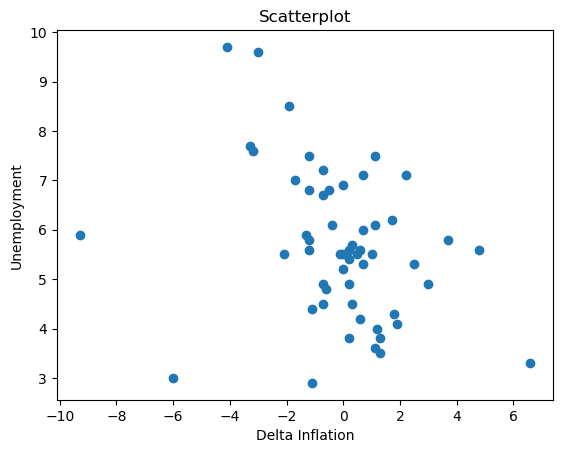

In [11]:
# Scatter plot of the change in Inflation and Unemployment

plt.scatter(df.delta_inflation,df.unemployment)

title = "Scatterplot"

plt.title(title)                             # Plot title
plt.xlabel("Delta Inflation")                        # Plot x-axis label
plt.ylabel("Unemployment")                   # Plot y-axis label

plt.show

In [12]:
# Performing the Augmented Dickey-Fuller (ADF) test for the first-difference of the Inflation series

test_delta_inf = stt.adfuller(df["delta_inflation"])

adf_statistic_delta_inf = test_delta_inf[0]

p_value_delta_inf = test_delta_inf[1]

# Printing ADF test statistic and p-value for the first-difference of the Inflation series
print("Inflation: ADF statistic", round(adf_statistic_inf,4),"and p-value",round(p_value_inf,4))
print("The ADF test statistic and p-value for the first-difference of the Inflation series are:", adf_statistic_delta_inf,p_value_delta_inf)

Inflation: ADF statistic -1.7459 and p-value 0.4077
The ADF test statistic and p-value for the first-difference of the Inflation series are: -8.770480911981787 2.5289749939211315e-14


## Expectations Augmented Phillips Curve

This variation of the Phillips curve can be modeled statistically as

$$ \Delta inflation_t= \beta_0 + \beta_1 unemployment_t + u_t$$


In [13]:
formula_delta = "delta_inflation ~ unemployment"

model_delta = smf.ols(formula_delta, df).fit(cov_type = "HC1")
print(model_delta.summary())

                            OLS Regression Results                            
Dep. Variable:        delta_inflation   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     4.986
Date:                Tue, 30 Apr 2024   Prob (F-statistic):             0.0298
Time:                        21:32:56   Log-Likelihood:                -123.00
No. Observations:                  55   AIC:                             250.0
Df Residuals:                      53   BIC:                             254.0
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8282      1.453      1.947   